In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import random
inf = float('inf')

#### Daten einlesen

In [26]:
def getData(nr):
    f = open('input'+str(nr)+'.txt')
    lines = f.readlines() 
    data = []
    for line in lines:
        x, y = line.split()
        data.append((float(x), float(y)))  
    f.close()
    return data
 

In [27]:
cities = getData(4)
len(cities)

25

#### Eine Distanzmatrix erstellen

In [28]:
def getDistMatrix(cities):
    N = len(cities)
    D = np.zeros((N,N))
    for x in range(N):
        for y in range(x+1,N):
            D[x,y]=math.dist(cities[x],cities[y])
            D[y,x]=D[x,y]
    return D 

In [29]:
D = getDistMatrix(cities)
D[3,7]                    # Distanz zwischen cities[3] und cities[7]

271.21737978548157

#### Pfade
Ein Pfad ist eine Abfolge der Indizes der cities.

In [30]:
path = list(range(len(cities)))              # die Cities werden in der Reihenfolge ihrer Indizes besucht.
print(path)                              

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [31]:
path1 = path[:]
random.shuffle(path1)
print(path1)                                 # eine zufällige andere Reihenfolge

[19, 2, 11, 3, 0, 13, 15, 7, 21, 8, 12, 5, 14, 6, 1, 10, 23, 18, 16, 24, 22, 9, 20, 4, 17]


In [32]:
def distance(path):
    ''' returns: die Länge des Pfades '''
    d = 0
    for i in range(len(path)-1):
        d+=D[path[i],path[i+1]]
    return d

In [33]:
distance(path), distance(path1)

(5043.991227529114, 5201.8621599121125)

#### Einen Pfad anzeigen

Der Startpunkt wird grün, der Endpunkt rot eingezeichnet.

In [34]:
def show(path):
    print(f'Distance = {distance(path)}, Länge={len(path)}')
    xc = [c[0] for c in cities]
    yc = [c[1] for c in cities]
    
    xt = [cities[i][0] for i in path] 
    yt = [cities[i][1] for i in path]

    plt.scatter(xc, yc,s=10)         # these are the cities (points)
    plt.scatter(xt[0],yt[0],s=20,c='green')    # startpoint   
    plt.scatter(xt[-1],yt[-1],s=20,c='red')    # endpoint
    plt.plot(xt, yt, linewidth=0.2)  # the edges
    plt.axis('equal')
    plt.show()  

Distance = 5043.991227529114, Länge=25


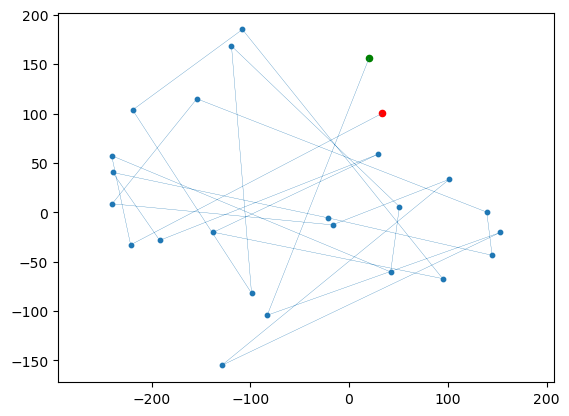

In [13]:
show(path)

#### Winkel

In [14]:
def getWinkel(A,B,C):
    '''
    returns: Winkel am Punkt A
    '''
    dx = C[0]-A[0]    # Ziel - Start
    dy = C[1]-A[1]
    alpha1 = math.degrees(math.atan2(dy,dx))
    dx = B[0]-A[0]    # Ziel - Start
    dy = B[1]-A[1]
    alpha2 = math.degrees(math.atan2(dy,dx))
    angle = abs(alpha1-alpha2)
    if angle > 180: angle-= 360
    return abs(angle)

def getAbbiegeWinkel(i,j,k,cities):
    ''' returns Abbiegewinkel bei cities[i] wenn man von cities[j] kommt und nach cities[k] geht '''
    abbiegeWinkel = 180 - getWinkel(cities[i],cities[j],cities[k])
    return abbiegeWinkel

In [15]:
cities = getData(4)
getAbbiegeWinkel(4,3,7,cities)     # der Abbiegewinkel bei cities[4], wenn man von cities[3] über cities[4] nach cities[7] geht.

123.03895055925796

Distance = 566.1372622281492, Länge=3


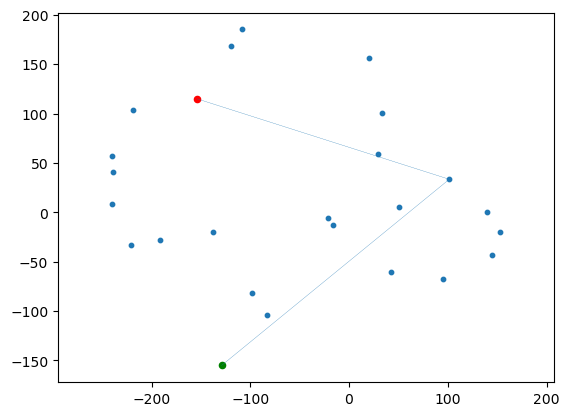

In [16]:
path = [3,4,7]
show(path)

#### TwoOpt

Für je zwei Punkte $cities[i], cities[j]$ mit $i + 1 < j$ wird geprüft, ob ein swap eine Verkürzung der Pfadlänge bringt. Dies
wird solange gemacht. Bis bei einem Durchgang keine Veränderung mehr erfolgt ist.

<img src='bild1.png'>

In [17]:
def twoOpt(path):
    p = path.copy()
    N = len(p)
    improved = True
    while improved:
        improved = False
        for i in range(0, N-2):   
            for j in range(i + 2, N-1):
                if D[p[i],p[j]] + D[p[i+1],p[j+1]] - D[p[i],p[i+1]] - D[p[j],p[j+1]] < 0:
                    p[i+1:j+1] = p[j:i:-1]
                    improved = True

    return p

Distance = 5043.991227529114, Länge=25


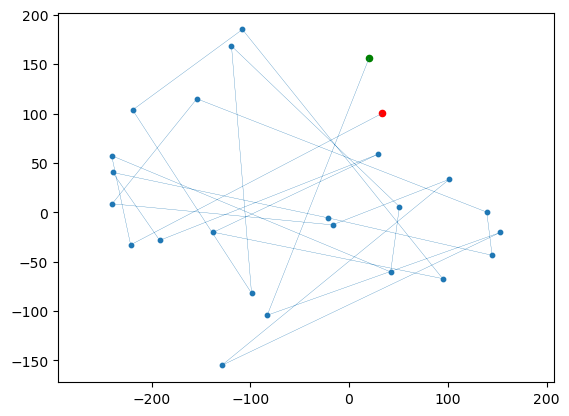

In [18]:
path = list(range(len(cities)))  
show(path)

Distance = 1331.9925716901175, Länge=25


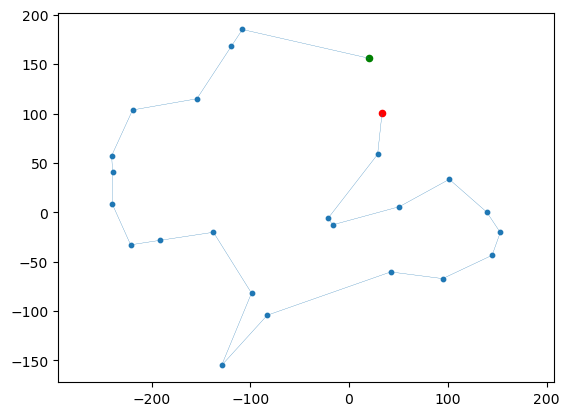

In [19]:
path = twoOpt(path)
show(path)

#### Greedy Tiefensuche

Wenn wir immer nur die jeweils nächste Stadt betrachten, kann es sein, dass wir zu keiner Lösung kommen, weil irgendwann alle noch nicht besuchten Städte einen Abbiegewinkel größer als 90 Grad haben. Deshalb führen wir eine Tiefensuche durch, bei der wir noch nicht besuchte Varianten in einer *frontier* abspeichern. Trotzdem wollen wir dafür sorgen, dass von den möglichen Städte die mit den kürzesten Entfernungen zuerst ausprobiert werden. Um unsere frontier nicht immer wieder sortieren zu müssen, nutzen wir einen Heap.


In [24]:
def nextstates(path):
    '''
    returns: Liste mit den möglichen Folgepfaden
    '''
    pass


def dfs(k):
    global best_val, best
    frontier =[[k]]    # die frontier besteht zu Beginn aus dem  path [k]
    while frontier:
        path = frontier.pop()  
        if len(path) == len(cities):       # eine Lösung wurde gefunden
            path = twoOpt(path)            # evtl wird path dadurch verbessert
            if distance(path) < best_val:  
                best_val = distance(path)
                best = path                # da path nicht weiter verändert wird, braucht man kein path.copy() 
        nxt = nextstates(path)             # die Liste mit allen möglichen Folgepfaden
        nxt.sort(key = lambda x : D[x[-2],x[-1]], reverse=True)     # aus der frontier sollen die pfade mit dem kürzesten letzten  
        for v in nxt:                                               # Teilpfad zuerst entnommen werden. Deswegen kommen die als letztes rein.
            frontier.append(v)


#### Zeitliche Begrenzung

Bei größeren Problemgrößen dauert die vollständige Tiefensuche zu lange. Deshalb sollte die nach angemessener Zeit abgebrochen werden und die beste gefunden Lösung ausgegeben werden.

In [23]:
import time
start = time.perf_counter()     
zaehl = 0
while True:
    zaehl+=1
    elapsed = time.perf_counter()-start
    if elapsed > 5:       # Zeit in Sekunden
        break
print(zaehl)

17613313
